# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Arka Lilang Wiratma
- **Email:** arka.lilang.wiratma@mail.ugm.ac.id
- **ID Dicoding:** Arka Lilang Wiratma

## Menentukan Pertanyaan Bisnis

- Apakah lebih banyak orang menyewa sepeda pada saat libur atau saat hari kerja?
- Pada musim apa sepeda paling banyak tersewa?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install matplotlib
!pip install numpy
!pip install pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('/content/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Dataset yang digunakan merupakan dataset penyewaan sepeda yang berisikan tahun, tanggal, musim, apakah hari itu sedang libur, apakah hari itu adalah hari kerja, kondisi lingkungan, penyewa sepeda adalah penyewa biasa atau terdaftar.
- Pembeda antara dua dataset tersebut adalah kolom jam dimana dataset hour.csv merupakan data yang diambil dalam kurun waktu satu jam, sehingga data sangat banyak sedangkan day.csv memiliki data yang dicatat dalam kurun waktu harian.

### Assessing Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Terlihat dari tampilan dataset pada hour_df yang memuat dataset dari hour.csv bahwa tidak ada dataset yang hilang dikarenakan pada kolom Non-Null Count bahwa jumplah tiap baris sama, namun lebih baik lagi jika dilakukan pengecekan menggunakan df.isnull()
- Terdapat 16 parameter pada dataset dengan total baris 17.379.

In [5]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dengan memanfaatkan df.describe, kita dapat milihat berbagai macam parameter baik dari total data, rata-rata, nilai quartal satu hingga tiga dst.
- Pada instant terdapat nilai max yang sangat tinggi, namun berdasarkan file "Readme.txt" dari file tersebut mengatakan bahwa instant merupakan index data.

In [6]:
print("Data hilang: ")
hour_df.isnull().sum()

Data hilang: 


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Setelah dilakukan pengecekan apakah terdapat data hilang atau tidak, ditemukan bahwa tidak ada data yang hilang dari dataset hour.csv

In [7]:
print("Data Dupliklat: ", hour_df.duplicated().sum())

Data Dupliklat:  0


**Insight:**
- Setelah dilakukan pengecakan apakah terdapat data yang kembar atau duplikat, ditemukan bahwa dataset tidak memiliki data duplikat.

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset day.csv sama seperti dataset hour.csv, namun tidak memiliki parameter hour, dimana membuat data tersebut memiliki jumlah yang lebih sedikit dibandingkan dengan dataset hour.csv.
- Tidak ditemukan data yang hilang
- Dataset terdiri dari 731 baris.

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset memiliki nilai yang cukup berbeda, dikarenakan minimnya jumlah dataset dibandingkan dengan dataset sebelumnya.

In [10]:
print("Data hilang: ")
day_df.isnull().sum()

Data hilang: 


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Seperti sebelumnya, tidak ditemukan data hilang.

In [11]:
print("Data Dupliklat: ", day_df.duplicated().sum())

Data Dupliklat:  0


**Insight:**
- Tidak ditemukan data duplikat

### Cleaning Data

In [12]:
day_df.dropna(axis=0, inplace=True)
hour_df.dropna(axis=0, inplace=True)

**Insight:**
- Sebenanrya tidak ada cleaning data yang harus dilakukan dikarenakan dataset yang diberikan sudah lengkap dan siap diolah langsung, namun kode diatas digunakan untuk melepas data yang memiliki nilai null atau kosong.

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
total_perjam = dict(casual = hour_df['casual'].sum(), terdaftar = hour_df['registered'].sum(), total = hour_df['cnt'].sum())
print("Jumlah Penyewa Perjam: ")
print("Kasual: {casual}; Terdaftar: {terdaftar}; total: {total}".format(**total_perjam))

Jumlah Penyewa Perjam: 
Kasual: 620017; Terdaftar: 2672662; total: 3292679


In [14]:
total_harian = dict(casual = day_df['casual'].sum(), terdaftar = day_df['registered'].sum(), total = day_df['cnt'].sum())
print("Jumlah Penyewa Harian: ")
print("Kasual: {casual}; Terdaftar: {terdaftar}; total: {total}".format(**total_harian))

Jumlah Penyewa Harian: 
Kasual: 620017; Terdaftar: 2672662; total: 3292679


**Insight:**
- Dilakukan pengecekan apakah data dari hour.csv dan day.csv memiliki nilai yang berbeda atau tidak. Setelah dilakukan pengecekan pada 3 kolom yaitu *casual*, *registered*, dan cnt ditemukan bahwa jumlah penyewa sama pada 3 kolom tersebut.

In [15]:
cek_sewa_harian_perjam = hour_df.groupby('dteday')['cnt'].sum().reset_index()
cek_sewa_harian_harian = day_df.groupby('dteday')['cnt'].sum().reset_index()
print(cek_sewa_harian_perjam)
print(cek_sewa_harian_harian)

         dteday   cnt
0    2011-01-01   985
1    2011-01-02   801
2    2011-01-03  1349
3    2011-01-04  1562
4    2011-01-05  1600
..          ...   ...
726  2012-12-27  2114
727  2012-12-28  3095
728  2012-12-29  1341
729  2012-12-30  1796
730  2012-12-31  2729

[731 rows x 2 columns]
         dteday   cnt
0    2011-01-01   985
1    2011-01-02   801
2    2011-01-03  1349
3    2011-01-04  1562
4    2011-01-05  1600
..          ...   ...
726  2012-12-27  2114
727  2012-12-28  3095
728  2012-12-29  1341
729  2012-12-30  1796
730  2012-12-31  2729

[731 rows x 2 columns]


**Insight:**
- Setelah melakukan penjumlahan pada hour.csv untuk melihat data hariannya apakah memiliki jumlah sama atau tidak. terlihat pada 5 data awal dan 5 data akhir bahwa dataset memiliki nilai yang sama.

In [16]:
gabung_sewa = pd.merge(cek_sewa_harian_perjam, cek_sewa_harian_harian, on = 'dteday', suffixes=('_hour','_day'))
gabung_sewa['sama'] = gabung_sewa['cnt_hour'] == gabung_sewa['cnt_day']
tidak_sama = gabung_sewa[gabung_sewa['sama'] == False]
if tidak_sama.empty == True:
  print("Data konsisten, tidak ada perbedaan data")
else:
  print("Terdapat perbedaan data yaitu: ")
  print(tidak_sama)

Data konsisten, tidak ada perbedaan data


**Insight:**
- Setelah dilakukan perbandingan, ditemukan bahwa tidak ada perbedaan data dari kedua dataset sehingga dataset bisa dianggap konsisten.

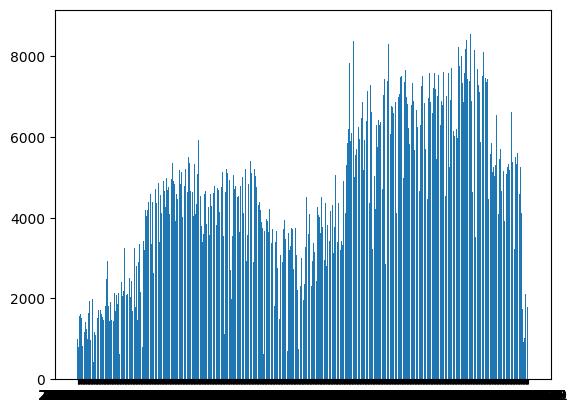

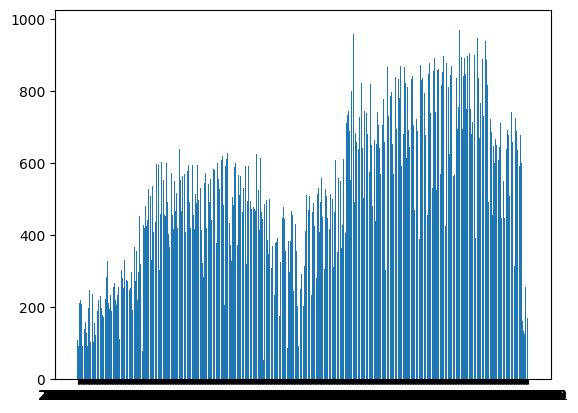

In [17]:
plt.bar(x=day_df['dteday'], height=day_df['cnt'])
plt.show()
plt.bar(x=hour_df['dteday'], height=hour_df['cnt'])
plt.show()

**Insight:**
- Terlihat pada grafik bahwa terjadi peningkatan seiring bertambahnya waktu, meskipun tabel tersebut kurang jelas dikarenakan terlalu banyaknya data.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [18]:
cek_sewa_harian_perjam = hour_df.groupby('workingday')['cnt'].sum().reset_index()
cek_sewa_harian_harian = day_df.groupby('workingday')['cnt'].sum().reset_index()
ganti_value_workingday = {1: 'Kerja', 0: 'Libur'}
cek_sewa_harian_perjam ['workingday']= cek_sewa_harian_perjam['workingday'].map(ganti_value_workingday)
cek_sewa_harian_harian ['workingday']= cek_sewa_harian_harian['workingday'].map(ganti_value_workingday)
print(cek_sewa_harian_perjam)
print(cek_sewa_harian_harian)

  workingday      cnt
0      Libur  1000269
1      Kerja  2292410
  workingday      cnt
0      Libur  1000269
1      Kerja  2292410


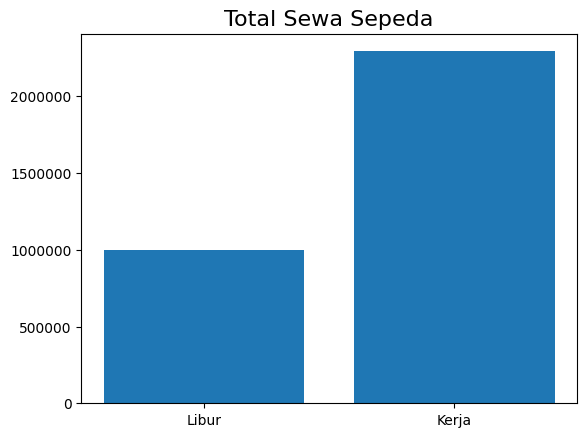

In [19]:
plt.bar(x=cek_sewa_harian_perjam['workingday'], height=cek_sewa_harian_perjam['cnt'])
plt.ticklabel_format(style='plain', axis='y')
plt.title("Total Sewa Sepeda", size=16)
plt.show()

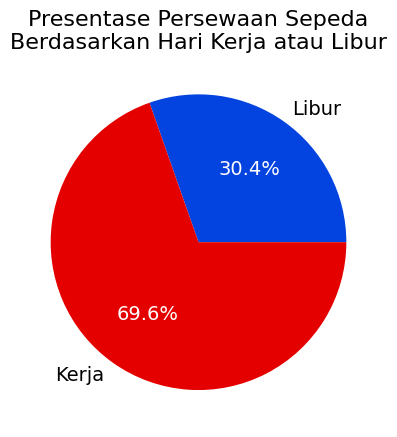

In [20]:
wedges, texts, autotexts = plt.pie(
                                  x=cek_sewa_harian_harian['cnt'],
                                  labels=cek_sewa_harian_perjam['workingday'],
                                  textprops={'color':"w"},
                                  colors=('#0343DF', '#E50000'),
                                  autopct='%1.1f%%',
                                  explode=(0,0)
                                  )

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

plt.title('Presentase Persewaan Sepeda\nBerdasarkan Hari Kerja atau Libur', fontsize=16)

for text in texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.show()

**Insight:**
- Setelah dilakukan perhitungan dan penampilan data dengan memanfaatkan library matplotlib untuk men-*plot*-kan data yang ada, terlihat bahwa total penyewa lebih banyak terjadi pada hari kerja, hal ini bisa saja dikarenakan lebih banyaknya hari kerja dibandingkan dengan hari libur.
- Terlihat pada histogram dan pie chart bahwa pada hari kerja terdapat banyak penyewa sepeda.

In [33]:
mean_kerja = day_df[day_df['workingday'] == 1]['cnt'].mean()
mean_libur = day_df[day_df['workingday'] == 0]['cnt'].mean()
mean_total = pd.DataFrame({
    'workingday':['Kerja', 'Libur'],
    'sewa':[mean_kerja, mean_libur]
})
print("Rata-rata sepeda disewa saat hari libur: ", int(mean_libur), "/hari")
print("Rata-rata sepeda disewa saat hari kerja: ", int(mean_kerja), "/hari")

Rata-rata sepeda disewa saat hari libur:  4330 /hari
Rata-rata sepeda disewa saat hari kerja:  4584 /hari


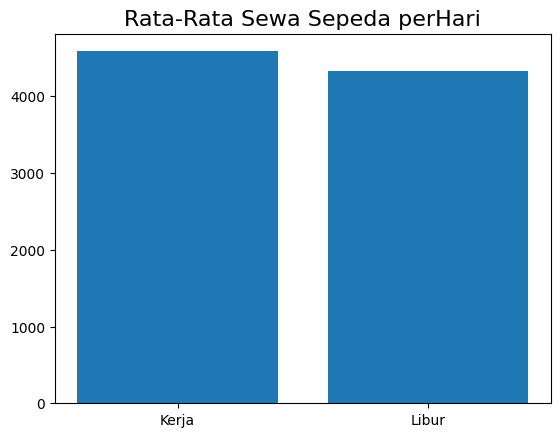

In [34]:
plt.bar(x=mean_total['workingday'], height=mean_total['sewa'])
plt.ticklabel_format(style='plain', axis='y')
plt.title("Rata-Rata Sewa Sepeda perHari", size=16)
plt.show()

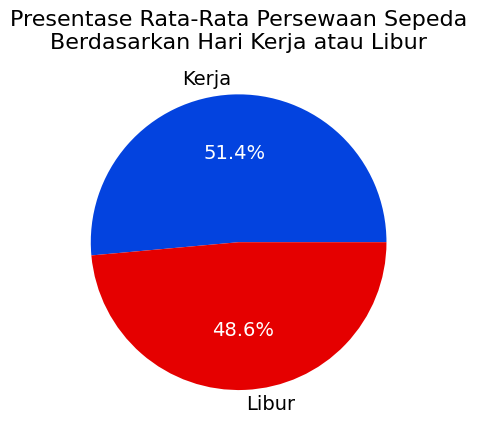

In [35]:
wedges, texts, autotexts = plt.pie(
                                  x=mean_total['sewa'],
                                  labels=mean_total['workingday'],
                                  textprops={'color':"w"},
                                  colors=('#0343DF', '#E50000'),
                                  autopct='%1.1f%%',
                                  explode=(0,0)
                                  )

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

plt.title('Presentase Rata-Rata Persewaan Sepeda\nBerdasarkan Hari Kerja atau Libur', fontsize=16)

for text in texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.show()

**Insight:**
- Tidak ada perubahan yang signifikan dari jumlah penyewa harian baik di hari libur maupun kerja, namun hari kerja lebih unggul sebesar 1,4% dari hari libur.
- Hal tersebut dapat diambil dari grafik histogram dan pie chart yang sudah terlihat diatas.

### Pertanyaan 2:

In [36]:
cek_sewa_musim_perjam = hour_df.groupby('season')['cnt'].sum().reset_index()
cek_sewa_musim_harian = day_df.groupby('season')['cnt'].sum().reset_index()
ganti_value_season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
cek_sewa_musim_perjam ['season']= cek_sewa_musim_perjam['season'].map(ganti_value_season)
cek_sewa_musim_harian ['season']= cek_sewa_musim_harian['season'].map(ganti_value_season)
print(cek_sewa_musim_perjam)
print(cek_sewa_musim_harian)

   season      cnt
0  spring   471348
1  summer   918589
2    fall  1061129
3  winter   841613
   season      cnt
0  spring   471348
1  summer   918589
2    fall  1061129
3  winter   841613


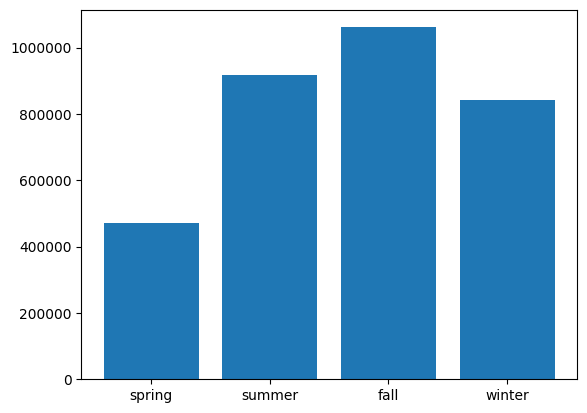

In [37]:
plt.bar(x=cek_sewa_musim_perjam ['season'], height=cek_sewa_musim_harian['cnt'])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

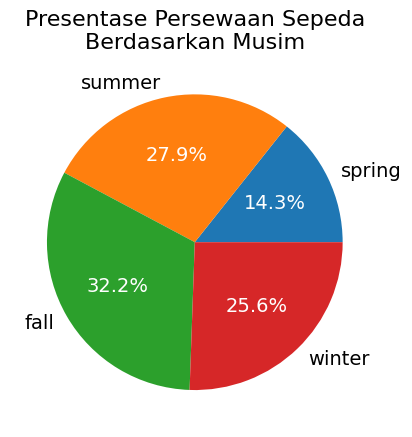

In [38]:
wedges, texts, autotexts = plt.pie(
                                  x=cek_sewa_musim_harian['cnt'],
                                  labels=cek_sewa_musim_perjam ['season'],
                                  textprops={'color':"w"},
                                  autopct='%1.1f%%',
                                  )

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

plt.title('Presentase Persewaan Sepeda\nBerdasarkan Musim', fontsize=16)

for text in texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.show()

**Insight:**
- Setelah membandingkan data berdasarkan hari kerja dan hari libur, maka dilakukan perbandingan antar musim. Terlihat dari tabel, grafik histogram, dan pie chart bahwa sepeda lebih banya disewa pada musim *fall* atau musim gugur. disusul oleh musim panas, musim dingin, dan terakhir musim dingin.

## Analisis Lanjutan (Opsional)

In [39]:
mean_total.to_csv("mean_total.csv", index=False)

## Conclusion

- Conclution pertanyaan 1: Tidak ada perbedaan signifikan dari jumlah sewa sepeda pada hari libur dan hari kerja
- Conclution pertanyaan 2: Musim gugur memiliki tingat penyewaan sepeda tertinggi dibandingkan dengan musim yang lain.